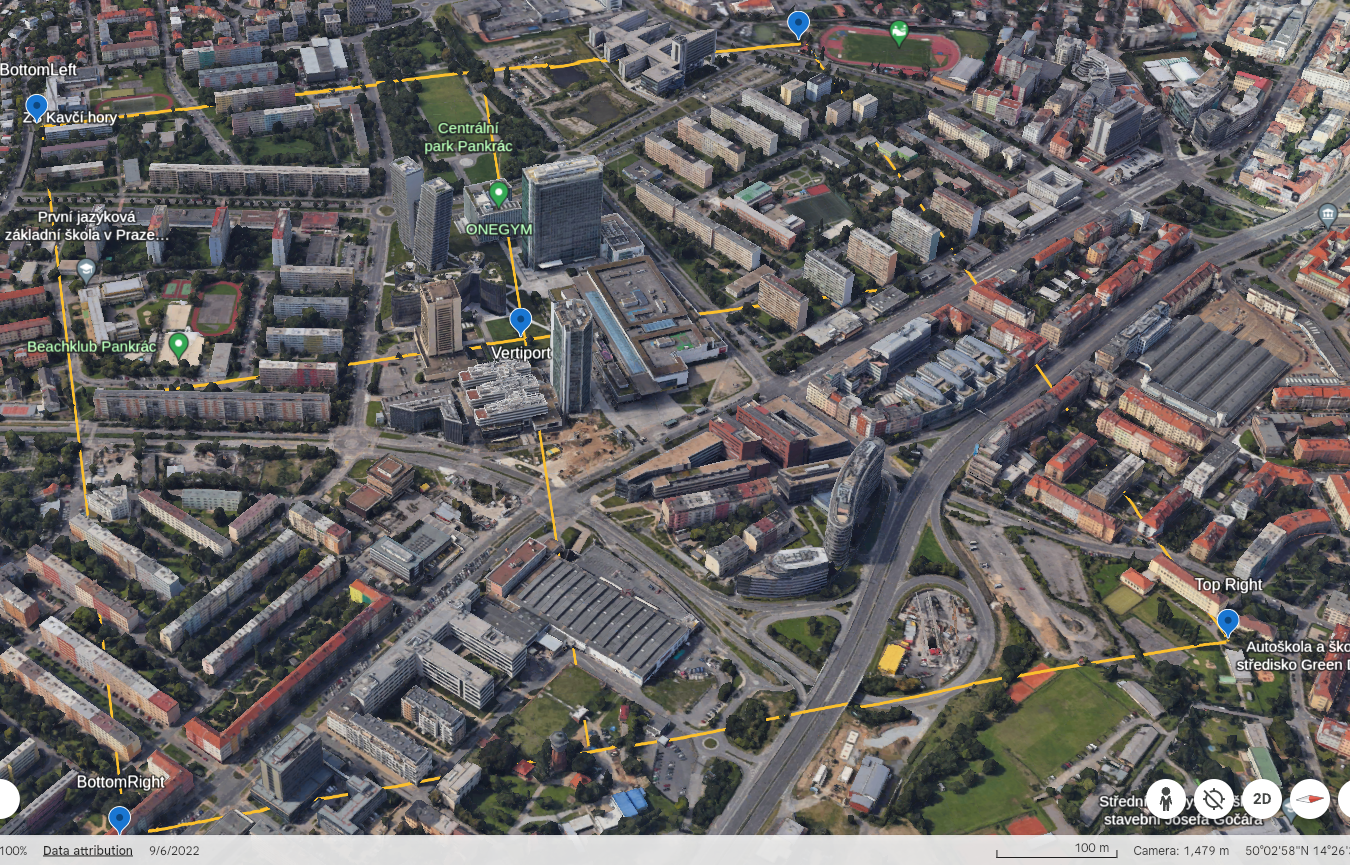

In [1]:
# Reconstructing Wind and TKE for drone operations using AI.

from IPython.display import Image
Image(filename='praguesimulated.png') 

In [2]:


# Install requirements !pip install -r requirements.txt

# Load libraries after adding relative path. 
#%run '/media/mandart/D/AI4Hydrop_Prague/ROM/Results/data_POD/libimport.py'
import os,sys
current_dir = os.getcwd()    # Get the current directory 
sys.path.append(current_dir)
fn=os.path.join(current_dir, 'Results','data_POD')
fn2=os.path.join(current_dir, 'Results','data_POD')
sys.path.append(fn2)
import libimport
import pandas as pd


In [3]:
if not os.path.exists(fn2):
    # If it doesn't exist, create the directory
    os.makedirs(directory_path)
    print(f"Directory '{fn2}' created successfully.")
else:
    print(f"Directory '{fn2}' already exists.")

path1=os.path.join(fn2,'libimport.py')   
path2=os.path.join(fn2,'funcimport.py')

# Step . Ask for user inputs - wind direction in degrees, locations in latitude/longitude.
# Ask for user inputs

user_input_at_command=False

if user_input_at_command==True:
    
    wind_direc = float(input("Enter single wind direction in degree: "))
    
    latitude_input = input("Enter list of latitudes (Y) in Decimal Degree(in comma-separated in range between 50.04585949932427 and 50.053957709673476) : example - 50.05,50.047 ")

    longitude_input = input("Enter list of longitudes (X) in Decimal Degree (in comma-separated in range between 14.430968123655077 and 14.444980676344922): 14.44,14.431")

    altitude_input = input("Enter list of altitudes in m 267m>Z>500m (comma-separated): 270,300")
    
    longitude_list = [float(lon) for lon in longitude_input.split(',')]
    altitude_list = [float(alt) for alt in altitude_input.split(',')]
    latitude_list = [float(lat) for lat in latitude_input.split(',')]
    
else:
    wind_direc=33
    latitude_list=[50.05,50.047]
    longitude_list=[14.44,14.431]
    altitude_list=[270,300]



#Check if all points are within the range . Keep only those that are in the range.count


# Print the inputs for verification
if len(latitude_list) != len(longitude_list) or len(latitude_list) != len(altitude_list):
    print("Error: The lists of latitude, longitude, and altitude must have the same length.")
else:
    print("Wind direction:", wind_direc)
    print("Latitude list:", latitude_list)
    print("Longitude list:", longitude_list)
    print("Altitude list:", altitude_list)


# Step . Reconstruct data using wind direction.
print("  ")
print("Reconstruct data using wind direction")
print("  ")
result_samples_k,dataframe_k,timetaken_k=libimport.reconstruct_AI_for_winddirection("k",wind_direc,fn,vectorU=False) #nr not needed.
result_samples_U,dataframe_U,timetaken_U=libimport.reconstruct_AI_for_winddirection("U",wind_direc,fn,vectorU=True)  #nr not neeeded. 
merged_dataframe_U_k_Relative_2_vertiport_reconstructed = pd.merge(dataframe_k,dataframe_U, on=['X','Y','Z'], how='outer')
print(f'Total time taken for reconstruction - {timetaken_U+timetaken_k} s')
print("  ")

ref_long_at_vertiport=14.4379744
ref_latitude_at_vertiport=50.0499086
#Latitude is the Y axis, longitude is the X axis. Belo since X,Y are relative to vertiport. Hence, we use this to obtain relative change in latitude/long from vertiport. then add reference to this change to get actual latitude and longitude.
merged_dataframe_U_k_Relative_2_vertiport_reconstructed['latitude']=(merged_dataframe_U_k_Relative_2_vertiport_reconstructed['Y'] / 111139)+ref_latitude_at_vertiport
lat_rad= math.radians(ref_latitude_at_vertiport) #merged_df_U_k_Relative_2_vertiport_reconstructed['latitude'].apply(math.radians)
#lat_rad.apply(math.cos)
cos_lat_rad=math.cos(lat_rad)
merged_dataframe_U_k_Relative_2_vertiport_reconstructed['longitude']=(merged_dataframe_U_k_Relative_2_vertiport_reconstructed['X'] / (111139 * cos_lat_rad))+ref_long_at_vertiport

# Step. Obtain values at specific points. 
print("  ")
print("Obtain values at specific points from reconstructed field")
print("  ")
dataset_nearest_latlong =get_U_and_k_for_location(longitude_list,latitude_list,altitude_list,merged_dataframe_U_k_Relative_2_vertiport_reconstructed,relative_distance_in_meter__or__Latlong='relat')
print(dataset_nearest_latlong)
#  Step 5. Visualize the trajectory.
print("  ")
print("Visualize")
print("  ")

visualize_plot(dataset_nearest_latlong)

Directory '/media/mandart/D/AI4Hydrop_Prague/ROM/Results/data_POD' already exists.
Wind direction: 33
Latitude list: [50.05, 50.047]
Longitude list: [14.44, 14.431]
Altitude list: [270, 300]
  
Reconstruct data using wind direction
  
/media/mandart/D/AI4Hydrop_Prague/ROM/Results/data_POD/k_rbf_interpolators.pkl
Coeff for mode 1 is  56.272505481710255
Coeff for mode 2 is  60.83803121987046
Coeff for mode 3 is  45.12202276291026
Coeff for mode 4 is  11.023757943340115
Coeff for mode 5 is  -3.88031346978255
Coeff for mode 6 is  10.637647103058782
Coeff for mode 7 is  -2.894827302544229
Coeff for mode 8 is  0.9157915992822723
 
CSV file saved successfully: /media/mandart/D/AI4Hydrop_Prague/ROM/Results/data_POD/k_33_Output.csv
Reconstruction completed. Output saved to: /media/mandart/D/AI4Hydrop_Prague/ROM/Results/data_POD/k_33_Output_Transformed.csv
 
 
/media/mandart/D/AI4Hydrop_Prague/ROM/Results/data_POD/U_rbf_interpolators.pkl
Coeff for mode 1 is  -217.6523461219864
Coeff for mode 2 i

NameError: name 'math' is not defined

## Ends here 
##################################################################################3.

merged_dataframe_U_k_Relative_2_vertiport_reconstructed.describe()

%run '/media/mandart/D/AI4Hydrop_Prague/ROM/Results/data_POD/libimport.py'

dataset_nearest_latlong =get_U_and_k_for_location(longitude_list,latitude_list,altitude_list,merged_dataframe_U_k_Relative_2_vertiport_reconstructed,relative_distance_in_meter__or__Latlong='relat')
print(dataset_nearest_latlong)

print(type(dataset_nearest_latlong))

dataset_nearest_latlong.columns

dataset_nearest_latlong

merged_dataframe_U_k_Relative_2_vertiport_reconstructed.Z.max()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import mplcursors

def visualize_plot(df):
    #df=df.to_frame()     
# Plot 3D terrain map
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X-Relative Distance from vertiport,m')
    ax.set_ylabel('Y-Relative Distance from vertiport,m')
    ax.set_zlabel('Z-Altitude,m')
    ax.set_xlim(-450, 450)  # Set limits for x direction
    ax.set_ylim(-450, 450)  # Set limits for y direction
    ax.set_zlim(267,500)  # Set limits for z direction
    #ax.plot(x, y, z, 'gray')  # Plot terrain map

# Plot drone's trajectory with colored line representing turbulence
    # for i in range(df.shape[0]):
    #    ax.scatter(0, 0, 267)
    #    ax.scatter(df['X'].iloc[i], df['Y'].iloc[i], df['Z'].iloc[i], c=df['tke'].iloc[i],cmap='viridis') #  plt.cm.jet(df['tke'].iloc[i]) , y is latitude, X changes with longitude.
    ax.scatter(0, 0, 267,color='grey',marker='^')
    ax.text(10, 10, 275, 'vertiport', color='red',ha='center', va='center')  
    
    df['Velocity_Magnitude']=np.sqrt(df['Velocity_X_']**2+  df['Velocity_Y_']**2+df['Velocity_Z_']**2)
    scatter = ax.scatter(df['X'],df['Y'],df['Z'], c=df['Velocity_Magnitude'], cmap='viridis')
    cbar = fig.colorbar(scatter)
    cbar.set_label('velocity, m/s')  
    tooltip = mplcursors.cursor(scatter, hover=True)
    tooltip.connect("add", lambda sel: sel.annotation.set_text(labels[sel.target.index]))

    plt.show()
    plt.savefig('vel.png')
    
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X-Relative Distance from vertiport,m')
    ax.set_ylabel('Y-Relative Distance from vertiport,m')
    ax.set_zlabel('Z-Altitude,m')
    ax.set_xlim(-450, 450)  # Set limits for x direction
    ax.set_ylim(-450, 450)  # Set limits for y direction
    ax.set_zlim(267,500)  # Set limits for z direction
    #ax.plot(x, y, z, 'gray')  # Plot terrain map

# Plot drone's trajectory with colored line representing turbulence
    # for i in range(df.shape[0]):
    #    ax.scatter(0, 0, 267)
    #    ax.scatter(df['X'].iloc[i], df['Y'].iloc[i], df['Z'].iloc[i], c=df['tke'].iloc[i],cmap='viridis') #  plt.cm.jet(df['tke'].iloc[i]) , y is latitude, X changes with longitude.
    ax.scatter(0, 0, 267,color='grey',marker='^')
    ax.text(10, 10, 275, 'vertiport', color='red',ha='center', va='center') 
    # ax.text(0, 0, 267, 'vertiport', color='red')    
    scatter = ax.scatter(df['X'],df['Y'],df['Z'], c=df['tke'], cmap='viridis')
    cbar = fig.colorbar(scatter)
    cbar.set_label('tke')     
    
    

    # Add color bar
    #cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='jet'))
    #cbar.set_label('Turbulence')

    plt.show()
    plt.savefig('tke.png')


In [ ]:
visualize_plot(dataset_nearest_latlong)

In [ ]:
latitude_list